# Group 25 Project: Investigating Volatile Acidity of Wine in Regards to Quality Rating

In [2]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
wine_quality <- read.csv('winequality-red.csv', sep = ";") |>
    select(total.sulfur.dioxide, quality) |>
    group_by(quality) |>
    summarize(mean = mean(total.sulfur.dioxide))
wine_quality

quality,mean
<int>,<dbl>
3,24.90000
4,36.24528
5,56.51395
6,40.86991
7,35.02010
8,33.44444


The dataset used in this project contains information related to the Portuguese “Vinho Verde” red wine, inlcuding volatile acidity and quality rating, which we are interested in investigating, among many other physiochemical traits. The wine is expert rated in a categorical variable from 1(very bad) to 10(very good).

Volatile acidity (g/dm³) is the measure of gaseous acids contained in wine. While naturally occuring as a product of wine fermentation, it can result in displeasant tastes and odors as an indication of spoilage and poor hygene practices when present in excess.  According to the  Code of Federal Regulations, the maxmimum amount of Volatile Acidity is 1.4 g/dm³. (Gardner, 2020) However, expensive wines may also contain high volatile acidity from certain microbes which provides heritage and character. (Mazzeo, 2021) A statistical analysis by Jose, n.d. concludes a strong correlation and a decreasing trend between volatile acidity and quality. This begs the question: Is there a significant difference in volatile acidity across different quality ratings of wine? 

To answer this question, we will conduct a multiple hypothesis test of ratings 3, 5, and 8 by looking at the mean and standard deviation of volatile acidity. As volatile acidity is a numeric variable, we can use mean as a point estimate because all the observations contribute equally. Since there are limited samples, we will use bootstraping to create resamples that will help estimate the sampling distribution. Moreover, standard deviation can help construct a confident interval, which approximates a possible range for the population parameter. We choose a standard 5% signficance level due to the subjective nature of wine rating as well as having little real world consequences. Our null hypothesis is that there is not a significant difference of volatile acidity, while the alternative hypothesis is that there is at least one out of the three ratings that significantly differs in level.



methods:
- bootstrap
- mean -- group by different samples
- multiple hypothesis test 
- confidence interval
- type 1 type 2 error analysis

In [4]:
data <- read.csv('winequality-red.csv', sep = ";")

head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


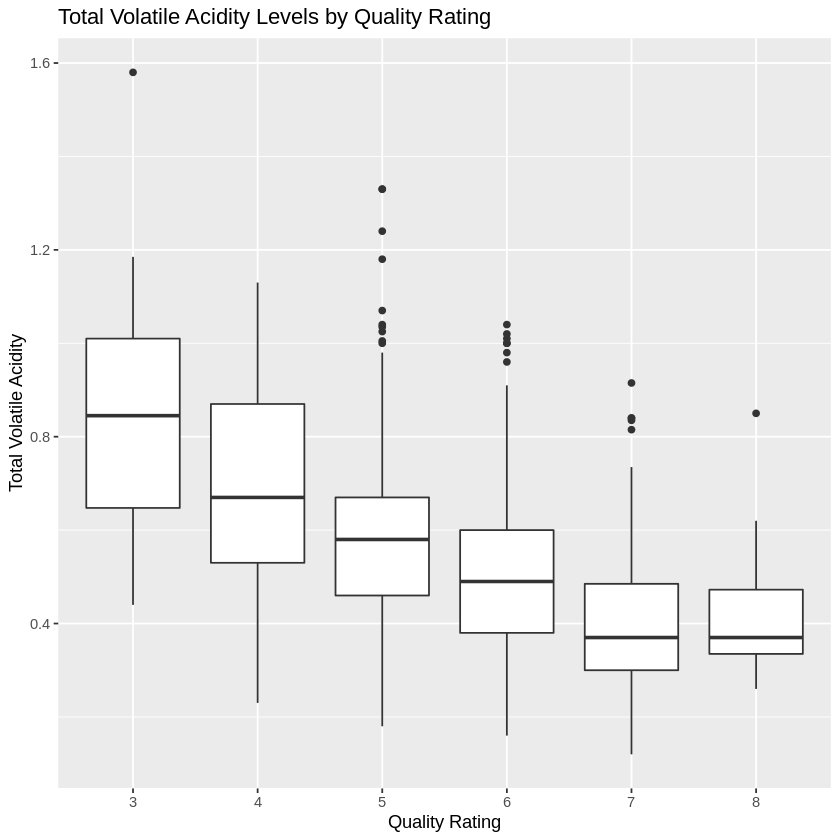

In [12]:
ggplot(data, aes(x = factor(quality), y = volatile.acidity)) +
  geom_boxplot() +
  labs(x = "Quality Rating", y = "Total Volatile Acidity") +
  ggtitle("Total Volatile Acidity Levels by Quality Rating")

In [6]:
parameter_estimates <- data %>%
  group_by(quality) %>%
  summarise(mean_volatile_acidity = mean(volatile.acidity))
print(parameter_estimates)

# A tibble: 6 × 2
  quality mean_volatile_acidity
    <int>                 <dbl>
1       3                 0.884
2       4                 0.694
3       5                 0.577
4       6                 0.497
5       7                 0.404
6       8                 0.423


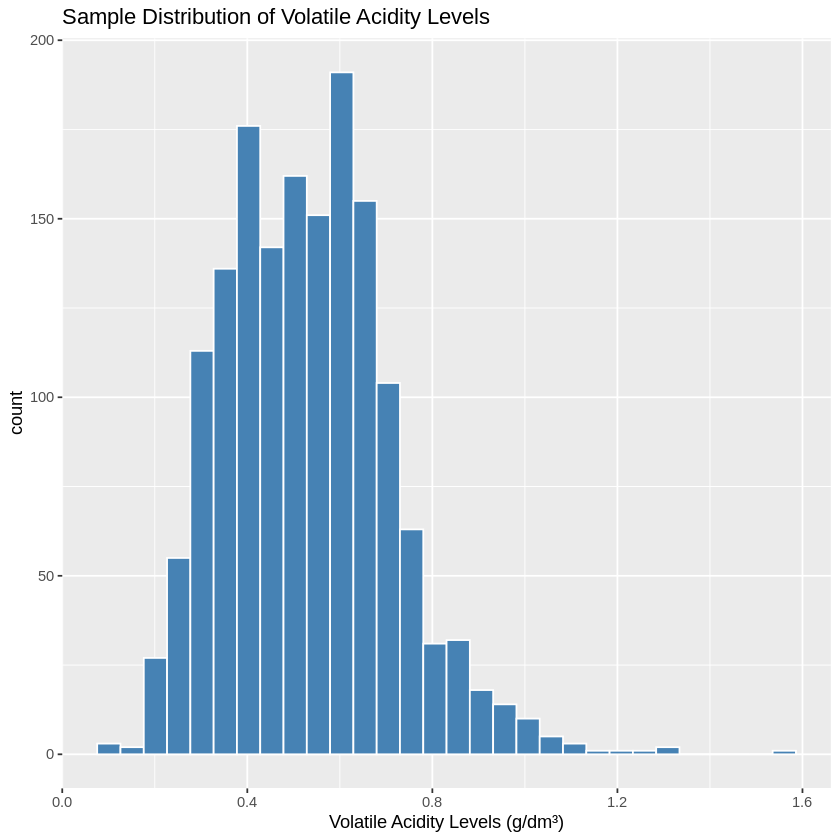

In [11]:

ggplot(data, aes(x = volatile.acidity)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
xlab("Volatile Acidity Levels (g/dm³)") +
  ggtitle("Sample Distribution of Volatile Acidity Levels")
     

# Methods:Plan
Our dataset is reliable comes from an authorative resource, which is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. Meanwhile, there is no missing data so that we can assume that it is a good representitive of the whole population. Even though we do not have accese to know if the database is collected randomly and each variable is indepdent from each other, we can use bootstrap sampling to get a good guess of the overall spread and shape of sampling distribution so that our result(point estimate, confidence interval, etc.) can be trustworthy. We will use multiple hypothesis tests as well as confidence intervals to make sure that our analysis is objective and scientific.
Our goal is to use the sample to make inference of the true population. From the plot above we can see that there is a certain kind of trend that lower volatile acidity often comes with higher rating. However, is this difference "significant" enough so that we can draw our conclusion that lower volatile acidity is relevant to higher rate? What if this trend only occurs in this specific sample? Even though we can take a rough guess of the true population parameter by plots and estimates above, we are not confident enough about our conclusion when taking a new sample. To make the influence of randomness as small as possible, we want to use bootstrapping to resample by a large number of times in order to provide us with accurate approximataion of the true standard error, confidence interval and performing hypothesis test. By taking advantage of bootstrapping, we can approximate the sampling distribution in an ideal situation, infer a point estimate, confidence interval as well as conclusion that we are confident enough to report to the stakeholders.
Through hypothesis testing and constructing confidence intervals in this project, we expect to find out if there is a significant difference in volatile acidity between different ratings of wine. Our findings can provide helpful and informed insight to wine buyers and debunk or confirm popular beliefs. In the future, we could build a predictive model to predict quality rating and utilize our findings in this study to decide if volatile acidity is a significant predictor or now. 

# references

dataset:
https://archive.ics.uci.edu/dataset/186/wine+quality

Gardner, D. (2020, June 16). Volatile acidity in wine. Penn State Extension. https://extension.psu.edu/volatile-acidity-in-wine

Mazzeo, J. (2021, November 9). What does “volatile acidity” mean in wine? Wine Enthusiast. https://www.wineenthusiast.com/basics/drinks-terms-defined/volatile-acidity-wine/

Jose, B. (n.d.). Exploratory data analysis on red wine - github pages. Exploratory Data Analysis on Red Wine. https://bibinmjose.github.io/RedWineDataAnalysis/ 
